# Análise dos dados de Segurança do Rio de Janeiro

## Introdução

Realizar análise dos dados de segurança pública do Estado do Rio de Janeiro, disponibilizado pelo <b>portal de Segurança do Estado do Rio de Janeiro</b> e aplicar algumas técnicas em <b>Python</b>, para captura, tratamento e visualização.  

Todas as informações e códigos, incluindo esse notebook e dataset, estão disponiveis no <b>GitHub</b> para acesso público. Espero que esse projeto sirva para ajudar nos primeiros passos de quem deseja iniciar de forma prática no uso do <b>Python</b> como ferramenta de análise de dados.  

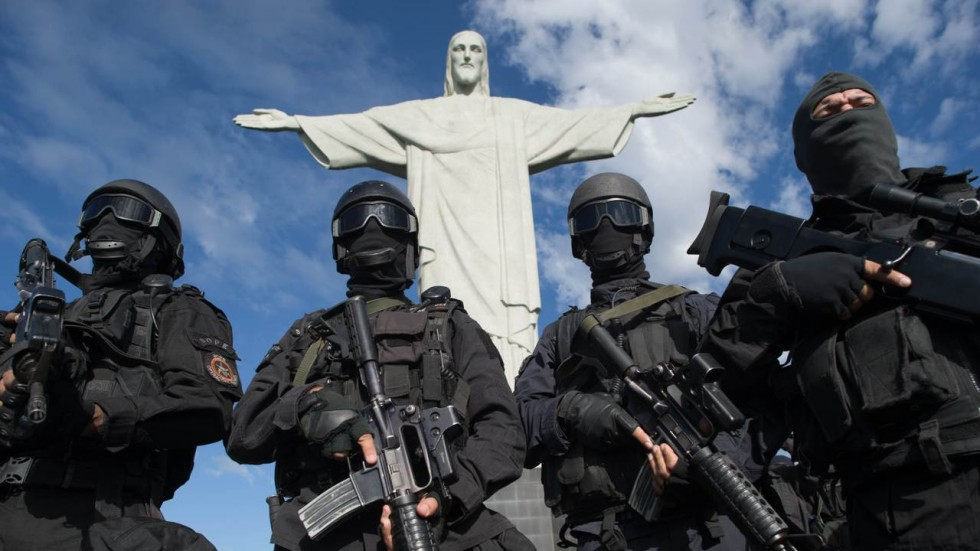

In [1]:
from IPython.display import Image
Image('banner1.jpg')

## Visão geral

<p> Data: 26/11/2017
<p> Analista: André Placido
<p> Objetivo: Aplicação de técnicas de data science.
<p> Dataset: Instituto de Segurança Pública do Estado do Rio de janeiro (http://www.ispdados.rj.gov.br/)
<p> <b>Repositório do projeto GitHub</b> (https://github.com/andreplacido/Python-Dados-Seguranca-RJ) 

### Dicionário de Dados
<p> Para entendimento completo da base de dados, é possível visualizar o metadados acessando o link
<href> http://www.ispdados.rj.gov.br/Arquivos/BaseDpDicionarioDeVariaveis.xlsx</href>


### Leitura do Dataset 
<p> Informações Gerais de Segurança 
<p> Base DP: evolução mensal das estatísticas por circunscrição de Delegacia (1/2003 a 10/2017)

In [2]:
# vamos trabalhar com os seguintes pacotes:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# leitura do arquivo buscando como fonte diretamente do site
file_name = "http://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv"

In [4]:
df = pd.read_csv(file_name, delimiter=';', encoding = "ISO-8859-1")

In [5]:
# vamos visualizar uma amostra dos dados
print ('Este dataset possui %s linhas e %s colunas' %(df.shape[0], df.shape[1]))
df.head()

Este dataset possui 23875 linhas e 60 colunas


,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,...,2,0,0,0,0,0,66,5,578,3
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,...,6,0,1,0,0,3,51,9,441,3
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,...,2,1,0,0,0,3,64,11,637,3
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,...,2,1,0,0,0,6,56,27,473,3
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,...,1,3,0,0,0,4,5,23,147,3


## Analise Exploratória 

In [6]:
#Tratamento de possíveis espaços na descrição do campo
df.Regiao = df.Regiao.str.strip()
df.munic = df.munic.str.strip()

### Criando subsets de dados (slice) para melhor entendimento dos dados.

#### Classificação de Crimes Violentos
Podemos ainda de acordo com o dicionário de dados fornecido, classificar as ocorrências em:<br>
Vítimas de Crimes Violentos, Vítimas de crimes de Trânsito, Roubos, Furtos, Outros registros de crime contra o patrimônio, Atividade Policial e Outros Registros



In [7]:
#crimes violentos
df2=df [['Regiao','hom_doloso','lesao_corp_morte','latrocinio',
         'hom_por_interv_policial','tentat_hom','lesao_corp_dolosa','estupro']]; 

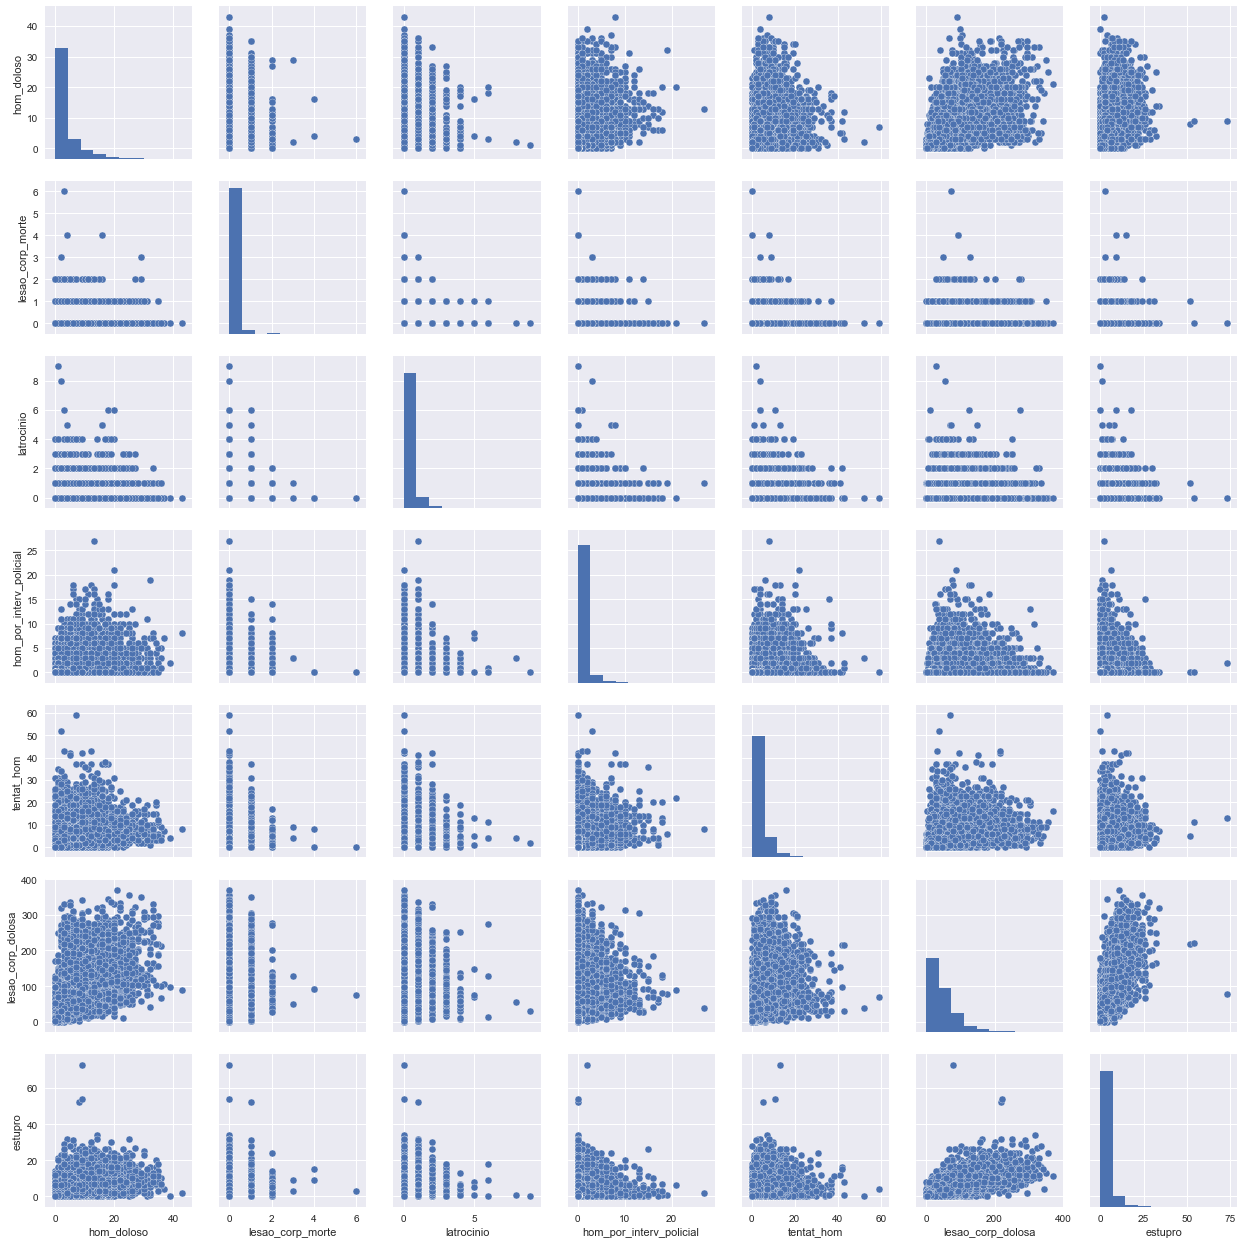

In [8]:
# Plot para distribuição bi_variadas
sns.pairplot(df2);

In [9]:
df2 = df2.groupby(['Regiao'])

In [10]:
df3=df2.sum(); df3

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro
Regiao,,,,,,,
Baixada Fluminense,26223,128,693,3180,15499,272668,17522
Capital,27377,330,1193,7875,27127,445468,21258
Grande Niterói,8354,43,316,1459,6185,106053,5931
Interior,18632,157,538,742,21351,342635,19991


In [11]:
# Função para imprimir o plot dentro do notebook 
import matplotlib.pyplot as plt
%matplotlib inline


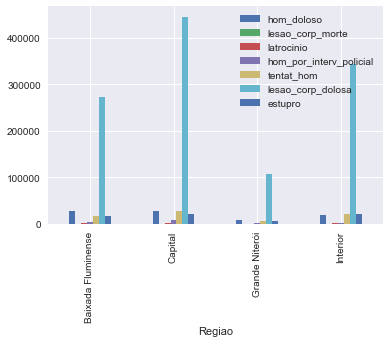

In [12]:
df3.plot(kind='bar')

Podemos dizer que lesão corporal dolosa tem um alto volume em comparação as demais ocorrências. Podemos tratá-la em um grupo distinto ou para um amelhor visualização fazer uma análise dos demais crimes ditos violentos sem essa métrica. Vamos ver como fica 

In [13]:
aedf2=df [['Regiao','hom_doloso','lesao_corp_morte','latrocinio',
         'hom_por_interv_policial','tentat_hom','estupro']]; 

In [14]:
aedf2 = aedf2.groupby(['Regiao'])

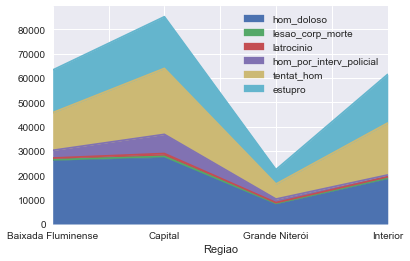

In [15]:
# vamos adicionar um tipo de grafico area para variar um pouco a técnica de anállise.
aedf3=aedf2.sum(); aedf3.plot(kind='area')

#### Análise Exploratória para Crimes violentos - conclusão parcial
Percebe-se claramente que há um indice menor na Grade Niterói com relação a crimes violentos que nas demais regiões, além disso, fazendo novo slice do dataset consideranddo todos os tipos de ocorrência exceto lesão corporal dolosa, conseguimos uma melhor visão dos tipos de crimes que estão acontecendo com volumes expressivos e que precisam de ações, são eles: estupro, Tentativa de homicídio e homicidios dolosos.

### Criando uma visão por Município

In [16]:
#crimes violentos por municípios
df4=df [['munic','hom_doloso','lesao_corp_morte','latrocinio',
         'hom_por_interv_policial','tentat_hom','lesao_corp_dolosa','estupro']]; 

In [17]:
df4 = df4.groupby(['munic'])

In [18]:
df5=df4.sum(); df5.head()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro
munic,,,,,,,
Angra dos Reis,1050,3,11,96,1207,14595,803
Araruama,742,1,24,15,455,9187,637
Armação dos Búzios,339,3,8,7,290,4502,235
Arraial do Cabo,57,1,0,1,110,1387,104
Barra Mansa,608,7,11,8,873,10004,482


In [19]:
# Visualizando alguns indicadores de estatística
df5.describe()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro
count,90.00000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,895.40000,7.311111,30.444444,147.288889,779.577778,12964.711111,718.911111
std,3073.84301,34.793660,128.410955,844.391227,2909.576462,47606.885189,2316.136335
min,6.00000,0.000000,0.000000,0.000000,7.000000,346.000000,9.000000
25%,49.25000,1.000000,2.000000,0.250000,67.750000,1916.500000,97.000000
50%,149.00000,2.000000,6.000000,3.500000,194.500000,3658.000000,217.000000
75%,622.50000,4.000000,16.000000,26.500000,580.750000,9106.750000,631.750000
max,27377.00000,330.000000,1193.000000,7875.000000,27127.000000,445468.000000,21258.000000


### Data Shape
Temos 2 metricas no dataframe que indicam mortes de policiais em serviço. Nesse momento queremos acompanhar históricamente a evolução desse indice, independente do fato de ser um policial civil ou militar, para isso, vamos criar uma nova coluna no data frame e um plot dessa evolução por ano.

In [20]:
# Criando nova variavel que soma o total de policiais mortos no Estado do Rio
df['tot_pol_mortos'] = df['pol_militares_mortos_serv'] + df['pol_civis_mortos_serv']

In [21]:
daepm = df [['vano','tot_pol_mortos']];

In [22]:
daepm = daepm.groupby(['vano'])

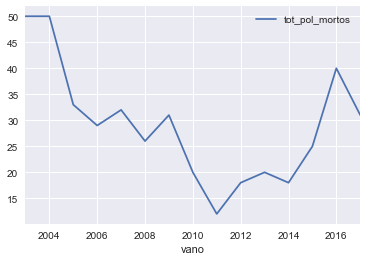

In [23]:
daepm2 = daepm.sum(); daepm2.plot()

Pela <a href=https://g1.globo.com/rio-de-janeiro/noticia/100-pms-assassinados-media-e-a-maior-em-mais-de-10-anos-no-rj.ghtml> Reportagem G1 </a>, sabemos que o número de policiais efetivamente mortos no Rio de Janeiro em 2017 ultrapassa de 100, mas de acordo com o dicionário de dados estão computadas as mortes em serviço.

### Box Plot
Dentro do processo de análise se pode identificar o quanto os dados estão próximos da mediana. Usaremos como exemplo analise sobre a variávei de homicídio doloso.

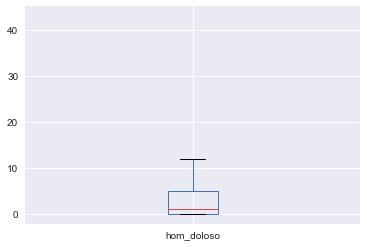

In [24]:
# Boxplot homicidio doloso
df.boxplot ('hom_doloso', return_type = 'axes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E11BCF9278>]], dtype=object)

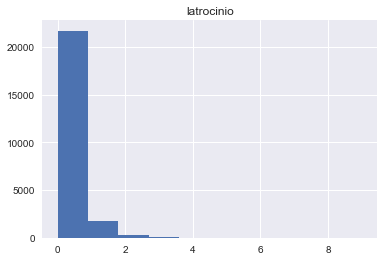

In [25]:
df.hist('latrocinio')

## Gerando Dataset 

Por diversos motivos a geração ou cópia do dataset é importante durante o processo de datasicence, vimos em diversos momentos anteriores a geração de dataframes intermediários, ou por um tratamento aplicado ou por segurança ou simplesmente para guardar um slice do dataset. 
A partir desse ponto, esse dataframe poderia dar origem a um novo dataset e isso é o que faremos agora! 
Depois de realizar todo o processo de Análise exploratória e entendimento básico de um grupo de dados, seguiremos com o processo de tratamento dos dados e consequente geração de um novo dataset, tratado para uso de uma ferramenta de <b>DataViz</b> que possa ser acessada pelo usuáiro final para gerar suas próprias análises. 

### Tratamento dos dados
    Faremos:
        1) Eliminação das colunas desnecessárias
        2) Tratamento dos valores nulos (NaN)
        3) Unpivot
        4) Tratamento das descrições
        5) Disponibilização do dataset tratado para acesso da ferramenta de DataViz


### Eliminando colunas desnecessárias

In [26]:
#df.drop()
# Perceba que nem todas as colunas são necessárias para a nossa análise. Vamos removê-las:
df.drop(['CISP', 'mes_ano', 'AISP','RISP','fase','total_roubos', 'total_furtos','indicador_letalidade',
         'indicador_roubo_rua', 'indicador_roubo_veic', 'registro_ocorrencias', 
         'outros_roubos', 'outros_furtos' ], axis=1, inplace =True)
df.head()


,mes,vano,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,...,apreensoes,gaai,aaapai_cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,tot_pol_mortos
0,1,2003,Rio de Janeiro,3304557,Capital,0,0,0,0,1,...,NaN,NaN,NaN,21,2,0,0,0,0,0
1,1,2003,Rio de Janeiro,3304557,Capital,3,0,0,0,0,...,NaN,NaN,NaN,15,6,0,1,0,0,0
2,1,2003,Rio de Janeiro,3304557,Capital,3,0,0,0,1,...,NaN,NaN,NaN,47,2,1,0,0,0,0
3,1,2003,Rio de Janeiro,3304557,Capital,6,0,0,0,2,...,NaN,NaN,NaN,26,2,1,0,0,0,0
4,1,2003,Rio de Janeiro,3304557,Capital,4,0,0,0,2,...,NaN,NaN,NaN,10,1,3,0,0,0,0


#### Comentário <i>drop</i>:
Lembrando que com o comando drop a(s) coluna(s) que foram removidas ainda ficam disponíveis para consulta. Para isso, basta usar o comando df.pop('NOME_COL')

### Nulos

Repare que o dataset original é composto por valores nulos (NaN). Nesse caso iremos tratar os valores nulos, substituindo por zero (0)

In [27]:
df.fillna(0).head()

,mes,vano,munic,mcirc,Regiao,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,...,apreensoes,gaai,aaapai_cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,tot_pol_mortos
0,1,2003,Rio de Janeiro,3304557,Capital,0,0,0,0,1,...,0.0,0.0,0.0,21,2,0,0,0,0,0
1,1,2003,Rio de Janeiro,3304557,Capital,3,0,0,0,0,...,0.0,0.0,0.0,15,6,0,1,0,0,0
2,1,2003,Rio de Janeiro,3304557,Capital,3,0,0,0,1,...,0.0,0.0,0.0,47,2,1,0,0,0,0
3,1,2003,Rio de Janeiro,3304557,Capital,6,0,0,0,2,...,0.0,0.0,0.0,26,2,1,0,0,0,0
4,1,2003,Rio de Janeiro,3304557,Capital,4,0,0,0,2,...,0.0,0.0,0.0,10,1,3,0,0,0,0


### Unpivot
Para a classificação acima, é necessário realizar um procedimento de Unpivot dos dados, transformando as colunas em linhas.


In [28]:
df2 = pd.melt(df, id_vars=['mes', 'vano', 'munic', 'mcirc','Regiao'], 
        value_vars=['hom_doloso','lesao_corp_morte', 'latrocinio', 'hom_por_interv_policial',
                    'tentat_hom','lesao_corp_dolosa','estupro','hom_culposo','lesao_corp_culposa',
                    'roubo_comercio','roubo_residencia', 'roubo_veiculo','roubo_carga','roubo_transeunte', 
                    'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico', 'roubo_celular',
                    'roubo_conducao_saque', 'roubo_bicicleta','furto_veiculos', 'furto_bicicleta',
                    'sequestro', 'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
                    'recuperacao_veiculos', 'cump_mandado_prisao', 'armas_apreendidas', 'prisoes', 'grp',
                    'apf_cmp', 'apreensoes','gaai', 'aaapai_cmba', 'ameaca', 'pessoas_desaparecidas',
                    'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos','pol_civis_mortos'])
df2.head()

,mes,vano,munic,mcirc,Regiao,variable,value
0,1,2003,Rio de Janeiro,3304557,Capital,hom_doloso,0.0
1,1,2003,Rio de Janeiro,3304557,Capital,hom_doloso,3.0
2,1,2003,Rio de Janeiro,3304557,Capital,hom_doloso,3.0
3,1,2003,Rio de Janeiro,3304557,Capital,hom_doloso,6.0
4,1,2003,Rio de Janeiro,3304557,Capital,hom_doloso,4.0



Seguindo o trabalho de transformação dos dados, agora percebem-se 3 atividades necessárias: <br>
1) Renomear colunas<br>
2) Melhorar a descrição das informações que passaram de nome de colunas para registros<br>
3) Criar uma referencia temporal ANO + MES que melhor poderá ser aproveitada pela ferramenta DataViz<br>

In [29]:
# Renomeando colunas
df2.columns = ['mes', 'ano', 'municipio','munic_circulacao','regiao','ocorrencia','quantidade']
df2.head()

,mes,ano,municipio,munic_circulacao,regiao,ocorrencia,quantidade
0,1,2003,Rio de Janeiro,3304557,Capital,hom_doloso,0.0
1,1,2003,Rio de Janeiro,3304557,Capital,hom_doloso,3.0
2,1,2003,Rio de Janeiro,3304557,Capital,hom_doloso,3.0
3,1,2003,Rio de Janeiro,3304557,Capital,hom_doloso,6.0
4,1,2003,Rio de Janeiro,3304557,Capital,hom_doloso,4.0


In [30]:
df2.dtypes

mes                   int64
ano                   int64
municipio            object
munic_circulacao      int64
regiao               object
ocorrencia           object
quantidade          float64
dtype: object

In [31]:
# Transformando a coluna que estão como inteiras em strings
df2.mes = df2.mes.astype(str)
df2.ano = df2.ano.astype(str)
df2.munic = df2.municipio.astype (str)
df2.munic_circulacao = df2.munic_circulacao.astype(str)

In [32]:
df2.dtypes

mes                  object
ano                  object
municipio            object
munic_circulacao     object
regiao               object
ocorrencia           object
quantidade          float64
dtype: object

In [33]:
# Tratamento de conteúdo
# Criando o nome do Mês e Ocorrência
df2['mes']= df2['mes'].replace(['1','2','3','4','5','6','7','8','9','10','11','12'],
                          ['01','02','03','04','05','06','07','08','09','10','11','12'])

#Criando descrição para as ocorrências
df2['ocorrencia']= df2['ocorrencia'].replace(['hom_doloso',
'lesao_corp_morte', 
'latrocinio', 
'hom_por_interv_policial',
'tentat_hom',
'lesao_corp_dolosa',
'estupro',
'hom_culposo',
'lesao_corp_culposa',
'roubo_comercio',
'roubo_residencia',
'roubo_veiculo',
'roubo_carga',
'roubo_transeunte', 
'roubo_em_coletivo', 
'roubo_banco', 
'roubo_cx_eletronico', 
'roubo_celular',
'roubo_conducao_saque', 
'roubo_bicicleta',
'furto_veiculos', 
'furto_bicicleta',
'sequestro', 
'extorsao', 
'sequestro_relampago', 
'estelionato', 
'apreensao_drogas',
'recuperacao_veiculos', 
'cump_mandado_prisao', 
'armas_apreendidas', 
'prisoes', 
'grp',
'apf_cmp', 
'apreensoes',
'gaai', 
'aaapai_cmba', 
'ameaca', 
'pessoas_desaparecidas',
'encontro_cadaver', 
'encontro_ossada', 
'pol_militares_mortos',
'pol_civis_mortos'],['Homicídio doloso',
                     'Lesão corporal seguida de morte',
                     'Latrocínio (roubo seguido de morte)',
                     'Homicídio decorrente de oposição à intervenção policial',
                     'Tentativa de homicídio',
                     'Lesão corporal dolosa',
                     'Estupro', 
                     'Homicídio culposo (trânsito)', 
                     'Lesão corporal culposa (trânsito)', 
                     'Roubo a estabelecimento comercial',
                     'Roubo a residência',
                     'Roubo de veículo',
                     'Roubo de carga',
                     'Roubo a transeunte',
                     'Roubo em coletivo',
                     'Roubo a banco',
                     'Roubo de caixa eletrônico', 
                     'Roubo de aparelho celular',
                     'Roubo com condução da vítima para saque em instituição financeira',
                     'Roubo de bicicleta', 
                     'Furto de veículo',
                     'Furto de bicicleta',
                     'Extorsão mediante sequestro (sequestro clássico)',
                     'Extorsão',
                     'Extorsão com momentânea privação da liberdade (sequestro relâmpago)',
                     'Estelionato',
                     'Apreensão de drogas',
                     'Recuperação de veículo',
                     'Cumprimento de mandado de prisão',
                     'Armas apreendidas',
                     'prisões',
                     'Guia de Recolhimento de Preso',
                     'Auto de Prisão em Flagrante + Cumprimento de Mandado de Prisão',
                     'Apreensões de adolescentes',
                     'Guia de Apreensão de Adolescente Infrator',
                     'Auto de Apreensão de Adolescente por Prática de Ato Infracional + Cumprimento de Mandado de Busca e Apreensão',
                     'Ameaça',
                     'Pessoas desaparecidas',
                     'Encontro de cadáver',
                     'Encontro de ossada',
                     'Policiais Militares mortos em serviço',
                     'Policiais Civis mortos em serviço'])
df2.head()

,mes,ano,municipio,munic_circulacao,regiao,ocorrencia,quantidade
0,01,2003,Rio de Janeiro,3304557,Capital,Homicídio doloso,0.0
1,01,2003,Rio de Janeiro,3304557,Capital,Homicídio doloso,3.0
2,01,2003,Rio de Janeiro,3304557,Capital,Homicídio doloso,3.0
3,01,2003,Rio de Janeiro,3304557,Capital,Homicídio doloso,6.0
4,01,2003,Rio de Janeiro,3304557,Capital,Homicídio doloso,4.0


In [34]:
# Adicionar nova coluna de Anomes
df2['anomes'] = df2[['ano','mes']].apply(lambda x: ''.join(x), axis=1)

### Exportando dados

In [35]:
df2.to_csv('dataframe_BDSPRJ.csv')

In [36]:
# Lendo o arquivo excel para um dataframe

BDSPRJ_df = pd.read_csv('dataframe_BDSPRJ.csv', encoding = "ISO-8859-1")

In [37]:
BDSPRJ_df.head()

,Unnamed: 0,mes,ano,municipio,munic_circulacao,regiao,ocorrencia,quantidade,anomes
0,0,1,2003,Rio de Janeiro,3304557,Capital,Homicídio doloso,0.0,200301
1,1,1,2003,Rio de Janeiro,3304557,Capital,Homicídio doloso,3.0,200301
2,2,1,2003,Rio de Janeiro,3304557,Capital,Homicídio doloso,3.0,200301
3,3,1,2003,Rio de Janeiro,3304557,Capital,Homicídio doloso,6.0,200301
4,4,1,2003,Rio de Janeiro,3304557,Capital,Homicídio doloso,4.0,200301


### DataViz

Dashboard gerado pela ferramenta de DataViz by PowerBI, após tratamento e expotação com Python.

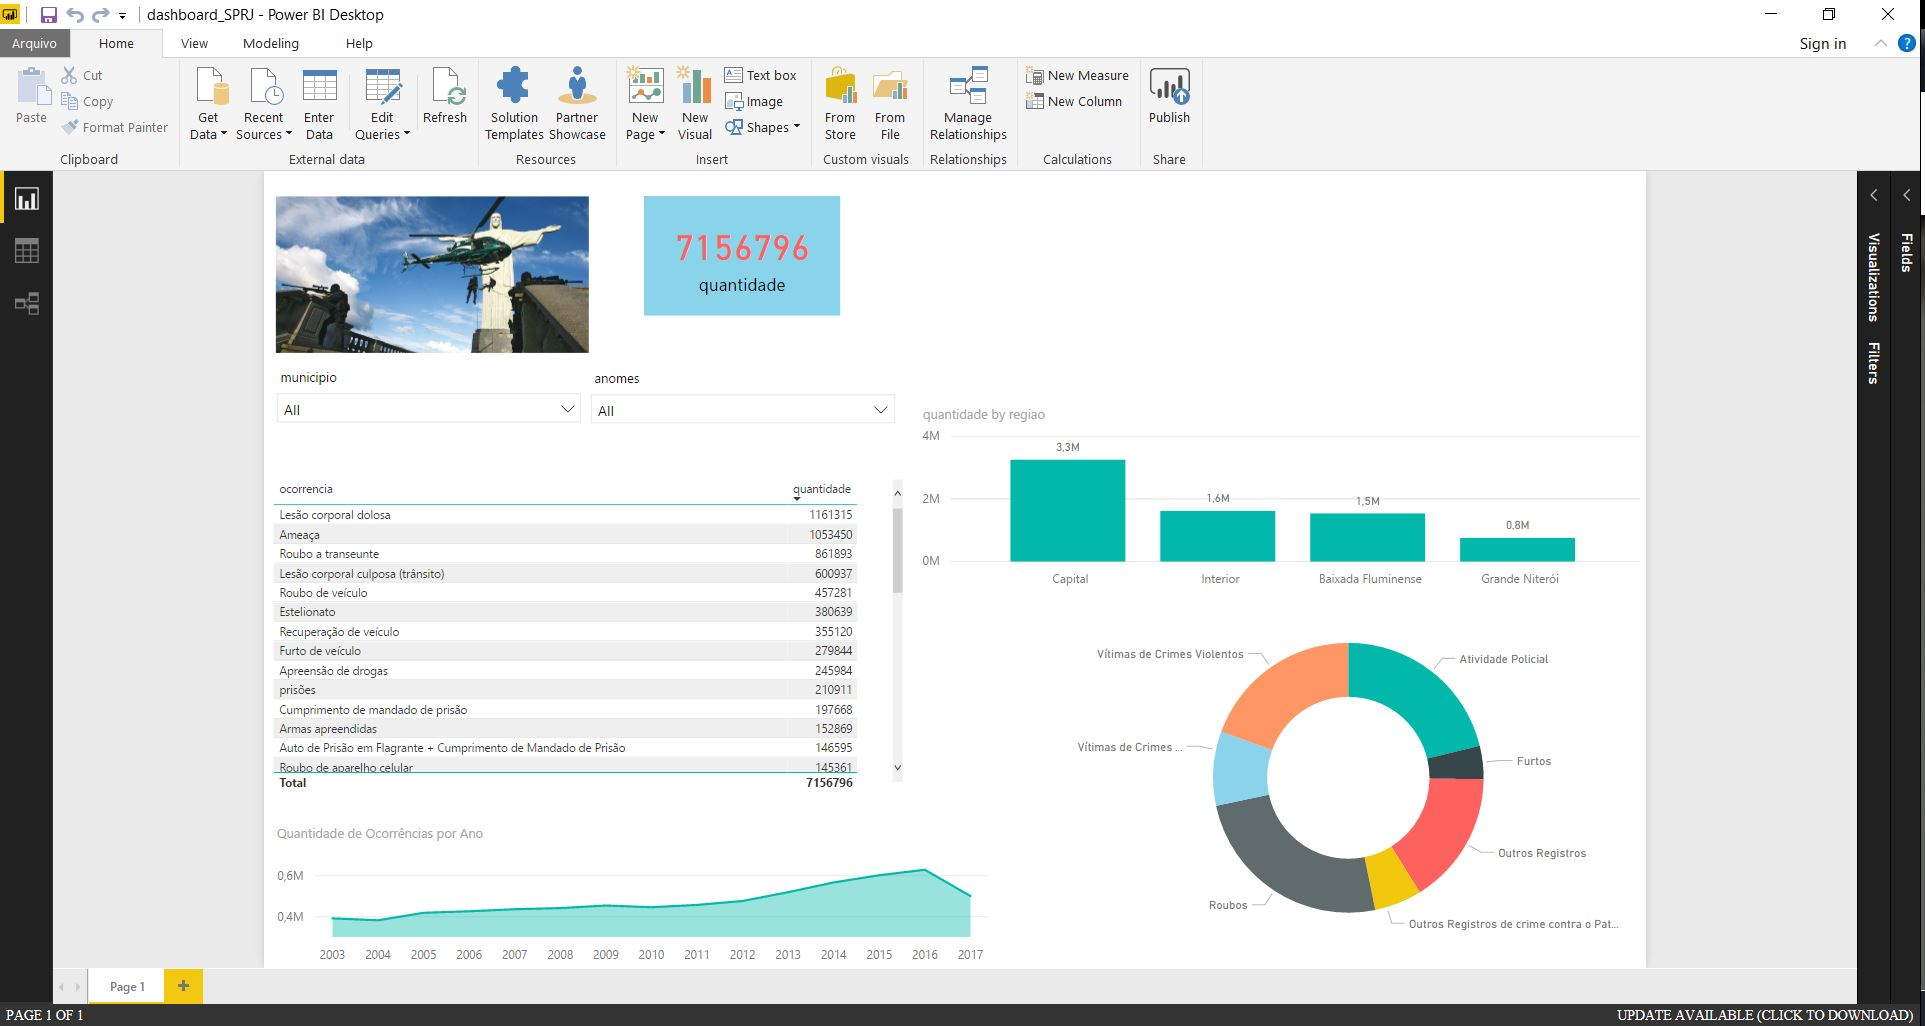

In [38]:
from IPython.display import Image
Image('Dashboard.jpg')

### Muito Obrigado
#### André Placido

###  <a href=http://td2i.com>Td2i - Transformando seus dados em Informação </a>
###  <a href=https://td2i.blogspot.com.br/>BLOG - Td2i </a>
###  <a href=https://www.facebook.com/Td2i-911161025705927/> facebook - Td2i </a>